### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Question 1 : Take employee_data Dataset and Perform following task:

In [36]:
empDf = pd.read_csv('./dataset/Employee_data.csv')
empDf.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


Position
Cloud Solutions Architect       160841.633333
Database Administrator (DBA)    132864.552632
DevOps Engineer                 161859.081081
IT Manager                      170711.550000
IT Security Analyst             134440.820513
IT Support Specialist            87683.806452
Network Administrator           116865.064516
Software Engineer               131357.416667
Systems Administrator           113117.447368
Systems Analyst                 127658.189189
Web Developer                   108238.116279
Name: Salary, dtype: float64


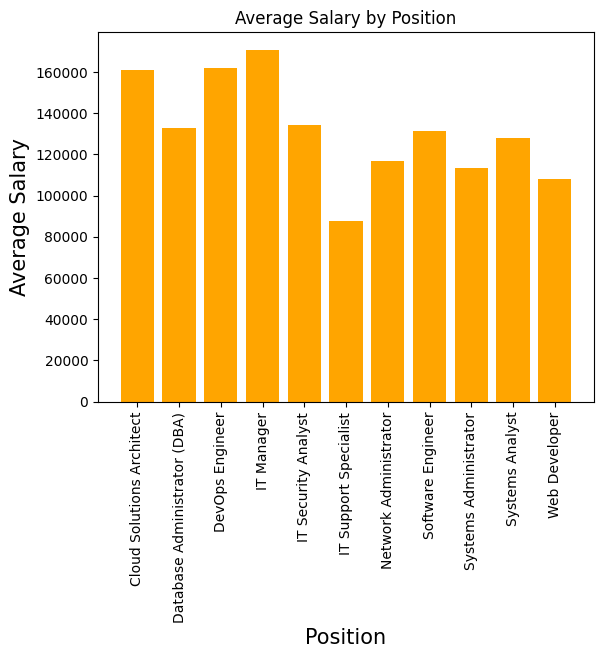

In [37]:
# Display Average Salary of each Position also plot same on graph
avgSalary = empDf.groupby('Position')['Salary'].mean()
print(avgSalary)

plt.bar(avgSalary.index,avgSalary, color='orange')
plt.title('Average Salary by Position')
plt.xlabel('Position',fontsize=15)
plt.ylabel('Average Salary',fontsize=15)
plt.xticks(rotation=90)
plt.show()

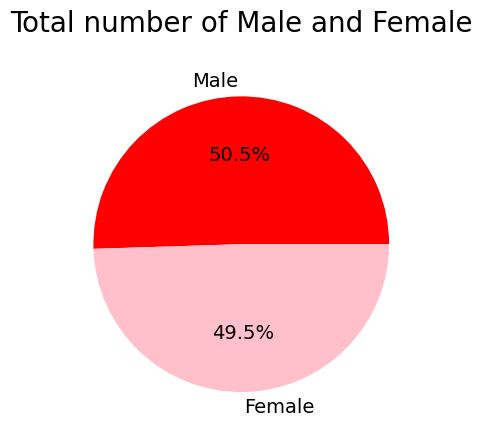

In [38]:
# Display total number of Male and Female employees and plot same on Chart
male = empDf[empDf['Gender'] == 'M'].count()['Gender']
female = empDf[empDf['Gender'] == 'F'].count()['Gender']

plt.pie([male,female],colors=['red','pink'],  labels=['Male', 'Female'],autopct='%1.1f%%',textprops={'fontsize':14})
plt.title('Total number of Male and Female',fontsize=20,pad=20)
plt.show()


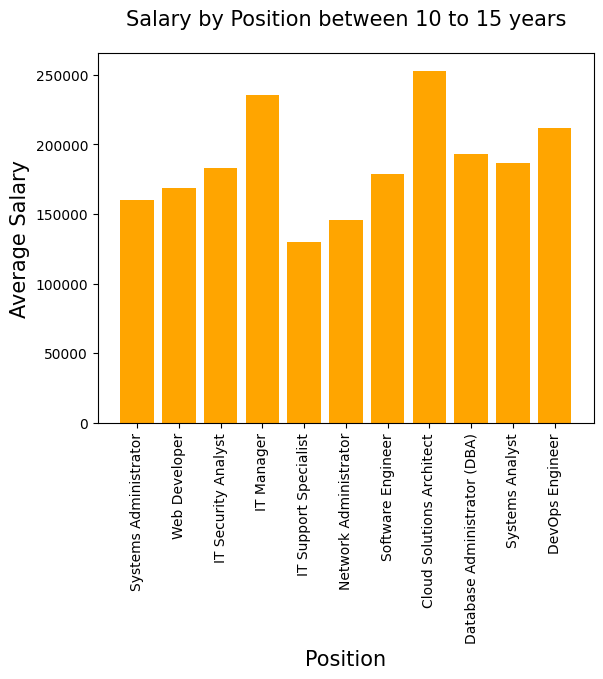

In [39]:
# Show using chart, how much salary is earn by the employee who having experience between 10 to 15 years

experienceDf = empDf[(empDf['Experience (Years)'] >= 10) & (empDf['Experience (Years)'] <= 15)][['Position','Salary']]

plt.bar(experienceDf['Position'],experienceDf['Salary'], color='orange')
plt.title('Salary by Position between 10 to 15 years',fontsize=15,pad=20)
plt.xlabel('Position',fontsize=15)
plt.ylabel('Average Salary',fontsize=15)
plt.xticks(rotation=90)
plt.show()

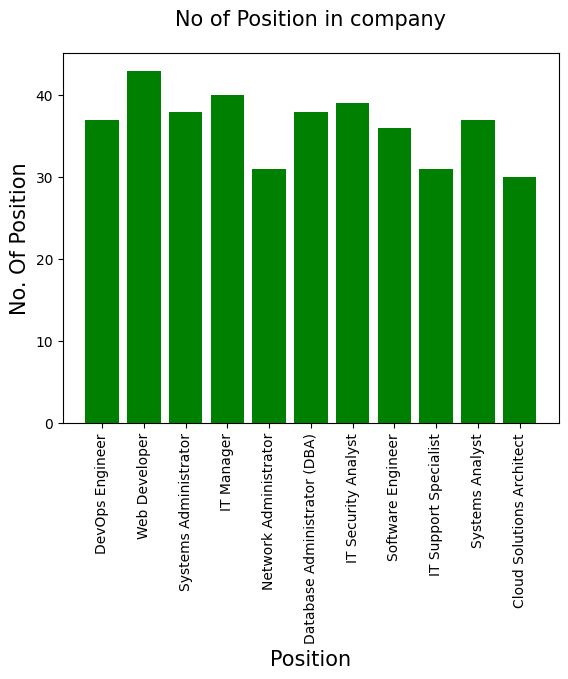

In [40]:
# Display a bar chart for number of position in company

noOfPosition = dict()
for i in empDf['Position'].unique():
    noOfPosition[i] = int(empDf[empDf['Position'] ==i]['Position'].count())

plt.bar(noOfPosition.keys(),noOfPosition.values(),color=['green'])
plt.title('No of Position in company',fontsize=15,pad=20)
plt.xlabel('Position',fontsize=15)
plt.ylabel('No. Of Position',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [41]:
# Analysis which position is better in terms of salary
print(f"The best position in terms of salary is '{avgSalary.idxmax()}' with an average salary of {avgSalary.max()}.")


The best position in terms of salary is 'IT Manager' with an average salary of 170711.55.


### 2. Take a Flipkart-Laptops Dataset and do the data preprocessing using pandas and visualize the important data from it using different charts. 
 
 

In [42]:
fkDf = pd.read_excel('./dataset/Flipkart-Laptops.xlsx')
print("Shape :",fkDf.shape)
print("Columns :",fkDf.columns)

Shape : (960, 10)
Columns : Index(['Product Name', 'ProductID', 'Product image', 'Actual price',
       'Discount price', 'Stars', 'Rating', 'Reviews', 'Description', 'Link'],
      dtype='object')


In [43]:
# Remove Column having null value and Duplicate values
fkDf = fkDf.dropna(how='all',axis=1)
fkDf = fkDf.drop_duplicates()
fkDf.shape

(960, 9)

In [44]:
# Remove Row where value is 'NIL'
fkDf.replace('NIL', np.nan, inplace=True)
fkDf.dropna(inplace=True)
fkDf.shape

/tmp/ipykernel_141098/2738969124.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fkDf.replace('NIL', np.nan, inplace=True)


(808, 9)

In [45]:
# Remove unused columns
fkDf.drop(['Description','Link'],axis=1,inplace=True)
fkDf.shape

(808, 7)

In [46]:
# Convert string row into number
print(fkDf.dtypes,'\n')
fkDf['Rating'] = fkDf['Rating'].str.replace(' Ratings','').str.replace(',','').astype(float)
fkDf['Reviews'] = fkDf['Reviews'].str.replace(' Reviews','').str.replace(',','').astype(float)
fkDf['Discount price'] = fkDf['Discount price'].astype(float)

print(fkDf.dtypes)
fkDf.columns


Product Name       object
ProductID          object
Actual price      float64
Discount price     object
Stars             float64
Rating             object
Reviews            object
dtype: object 

Product Name       object
ProductID          object
Actual price      float64
Discount price    float64
Stars             float64
Rating            float64
Reviews           float64
dtype: object


Index(['Product Name', 'ProductID', 'Actual price', 'Discount price', 'Stars',
       'Rating', 'Reviews'],
      dtype='object')

100.0


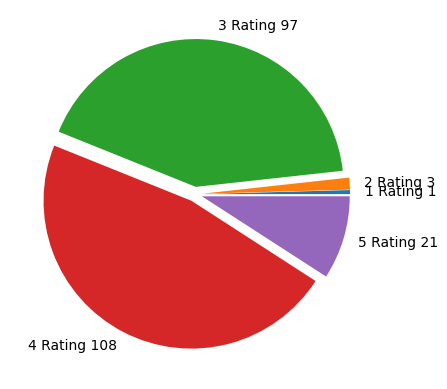

In [47]:
rate = dict()
label = []
for i in range(5):
    rate[i] = fkDf[(fkDf['Rating'] >= i)&(fkDf['Rating'] <= i+1)].count()['Rating']
    label.append(f'{i+1} Rating {rate[list(rate.keys())[-1]]}')

total = sum(rate.values())
percentage = [(i/total)*100 for i in rate.values()]
print(sum(percentage))
plt.pie(percentage,labels=label,explode=tuple(0.05 for _ in range(len(rate)) ))
plt.show()

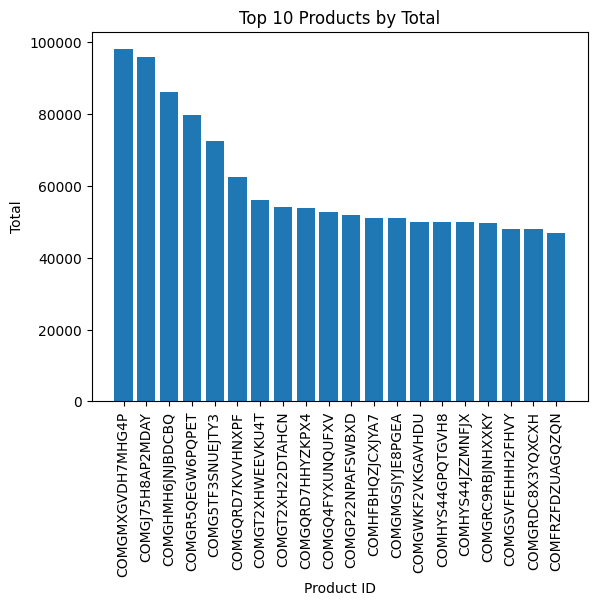

In [57]:
# Total prise data
fkDf['Total'] = fkDf['Actual price'] - fkDf['Discount price']
top10DF= fkDf.sort_values(by='Total', ascending=False).head(20)
plt.bar(top10DF['ProductID'],top10DF['Total'])
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total')
plt.title('Top 10 Products by Total')
plt.show()

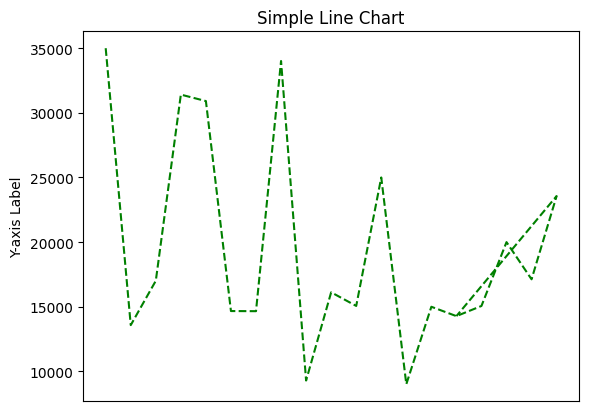

In [69]:
plt.plot(fkDf['ProductID'].head(20), fkDf['Total'].head(20), linestyle='--', color='g')

# Add labels and title
plt.ylabel("Y-axis Label")
plt.title("Simple Line Chart")
plt.xticks([])
# Display the plot
plt.show()
